# Análise exploratória de dados

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns 
from IPython.display import display, Markdown 

## 1. Descrição dos dados

### Conjunto de dados

Este conjunto de dados é uma coleção de mais de 90 mil carros abrangendo os anos de 1970 a 2024. Além disso, conta com informações como o modelo, preço,quilometragem, transmissão, tamanho do motor, fabricante e tipo de combustível.

In [7]:
df = pd.read_csv('../data/raw/CarsData.csv')
df.to_csv('../data/raw/CarsData.csv', index=False)

#### Dimensão do DataFrame

In [5]:
df.shape

(97712, 10)

#### Visão geral dos dados

In [6]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


#### Informações da tabela

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


#### Colunas da tabela

In [33]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Manufacturer'],
      dtype='object')

### Dicionário de dados

In [8]:
df_dc = pd.read_csv('../data/external/DictionaryCarsData.csv')
df_dc.head()

,Variável,Descrição
0,Model,O modelo do carro
1,Year,O ano de fabricação do carro
2,Price,O preço do carro
3,Transmission,O tipo de transmissão usado no carro
4,Mileage,A quilometragem do carro


### Adição de duas colunas na documentação

É necessária duas colunas com o tipo e o subtipo das variáveis no discionário, que serão adicionadas abaixo.

In [8]:
caminho = '../data/external/DictionaryCarsData.csv'

df_dc = pd.read_csv(caminho)

#adição da coluna tipo
Tipo = [
    'Qualitativa', 'Quantitativa', 'Quantitativa', 'Qualitativa', 
    'Quantitativa', 'Qualitativa', 'Quantitativa', 'Quantitativa', 
    'Quantitativa', 'Qualitativa'
]

#adição da coluna subtipo
Subtipo = [
    'Nominal', 'Discreta', 'Continua', 'Nominal', 
    'Continua', 'Nominal', 'Continua', 'Continua', 
    'Continua', 'Nominal'
]

df_dc['Tipo'] = Tipo
df_dc['Subtipo'] = Subtipo

df_dc.to_csv(caminho, index=False)

In [9]:
df_dc.head()

,Variável,Descrição,Tipo,Subtipo
0,Model,O modelo do carro,Qualitativa,Nominal
1,Year,O ano de fabricação do carro,Quantitativa,Discreta
2,Price,O preço do carro,Quantitativa,Continua
3,Transmission,O tipo de transmissão usado no carro,Qualitativa,Nominal
4,Mileage,A quilometragem do carro,Quantitativa,Continua


In [12]:
df_dc.columns

Index(['Variável', 'Descrição', 'Tipo', 'Subtipo'], dtype='object')

### Estatísticas Descritivas

Estatísticas descritivas para as variáveis numéricas (média, mediana, desvio padrão, valores mínimos e máximos, quartis).

In [13]:
df.describe().round(2)

,year,price,mileage,tax,mpg,engineSize
count,97712.00,97712.00,97712.00,97712.00,97712.00,97712.00
mean,2017.07,16773.49,23219.48,120.14,55.21,1.66
std,2.12,9868.55,21060.88,63.36,16.18,0.56
min,1970.00,450.00,1.00,0.00,0.30,0.00
25%,2016.00,9999.00,7673.00,125.00,47.10,1.20
50%,2017.00,14470.00,17682.50,145.00,54.30,1.60
75%,2019.00,20750.00,32500.00,145.00,62.80,2.00
max,2024.00,159999.00,323000.00,580.00,470.80,6.60


#### Categorias e Frequências

Estatísticas descritivas para variáveis qualitativas, categorias únicas e as frequências.

In [14]:
df = pd.read_csv('../data/raw/CarsData.csv')

colunas_categoricas = ['model', 'transmission', 'fuelType', 'Manufacturer']

for coluna in colunas_categoricas:
    print(f'Valores e Frequências para a coluna {coluna}:')
    print(df[coluna].value_counts())
    print('\n')

Valores e Frequências para a coluna model:
Fiesta             6509
Golf               4797
Focus              4555
C Class            3694
Corsa              3285
                   ... 
Transit Tourneo       1
Escort                1
200                   1
Ranger                1
220                   1
Name: model, Length: 195, dtype: int64


Valores e Frequências para a coluna transmission:
Manual       55502
Semi-Auto    22296
Automatic    19905
Other            9
Name: transmission, dtype: int64


Valores e Frequências para a coluna fuelType:
Petrol      53982
Diesel      40419
Hybrid       3059
Other         246
Electric        6
Name: fuelType, dtype: int64


Valores e Frequências para a coluna Manufacturer:
ford          17811
volkswagen    14893
vauxhall      13258
merc          12860
BMW           10664
Audi          10565
toyota         6699
skoda          6188
hyundi         4774
Name: Manufacturer, dtype: int64




#### Número de categorias por variáveis

In [15]:
df = pd.read_csv('../data/raw/CarsData.csv')

colunas_categoricas = ['model', 'transmission', 'fuelType', 'Manufacturer']

categorias_unicas = {}

for coluna in colunas_categoricas:
    categorias_unicas[coluna] = df[coluna].nunique()

for coluna, num_categorias in categorias_unicas.items():
    print(f'{coluna}: {num_categorias}')

model: 195
transmission: 4
fuelType: 5
Manufacturer: 9


### Verificação de valores ausentes

In [16]:
valores_ausentes = df.isnull().sum()

total_valores = df.shape[0]



analise_ausentes = pd.DataFrame({
    'Valores Ausentes': valores_ausentes,
})

print(analise_ausentes)

              Valores Ausentes
model                        0
year                         0
price                        0
transmission                 0
mileage                      0
fuelType                     0
tax                          0
mpg                          0
engineSize                   0
Manufacturer                 0


## 2. Perguntas de partida e hipóteses

#### As perguntas de partida e hipóteses serão com base nos seguintes questionamentos: ###
#### 1. Evolução de Preços:
- Como os preços dos carros mudaram ao longo do tempo (1970-2024)? 
- Existe uma diferença significativa de preço entre carros de diferentes fabricantes ao longo dos anos?
#### 2. Características dos Carros:
- Como as características dos carros (como tipo de combustível, potência, consumo de combustível) evoluíram ao longo das décadas?
- Houve um aumento significativo no uso de carros elétricos ou híbridos desde 2010?
#### 4. Desempenho e Eficiência:
- Houve uma melhora no desempenho (potência do motor) em relação ao consumo de combustível (km/l)?
- Como a eficiência de combustível dos carros mudou ao longo do tempo, especialmente com a introdução de novos modelos e tecnologias?
#### 5. Mudanças no Mercado de Automóveis:
- Quais marcas ou modelos dominaram o mercado de carros em diferentes décadas?
- Como a segmentação do mercado (carros de luxo, populares, esportivos) evoluiu ao longo dos anos?

## 1. Evolução de Preços:

### Como os preços dos carros mudaram ao longo do tempo (1970-2024)? 


In [16]:
media_precos = df.groupby('year')['price'].mean().reset_index()
media_precos['price'] = media_precos['price'].round(2)

media_precos.head()

,year,price
0,1970,17747.00
1,1996,4497.50
2,1997,4886.25
3,1998,8257.25
4,1999,3521.67


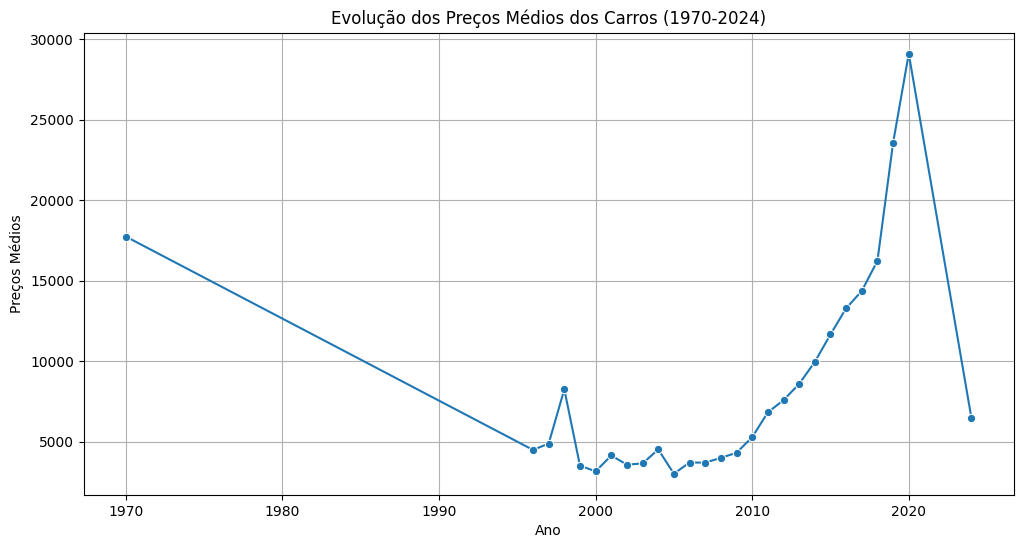

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=media_precos, x='year', y='price', marker='o')
plt.title('Evolução dos Preços Médios dos Carros (1970-2024)')
plt.xlabel('Ano')
plt.ylabel('Preços Médios')
plt.grid(True)
plt.show()


In [21]:
mediana_precos = df.groupby('year')['price'].median().reset_index()

mediana_precos.head()

,year,price
0,1970,17747.0
1,1996,4497.5
2,1997,4300.0
3,1998,4474.5
4,1999,3972.5


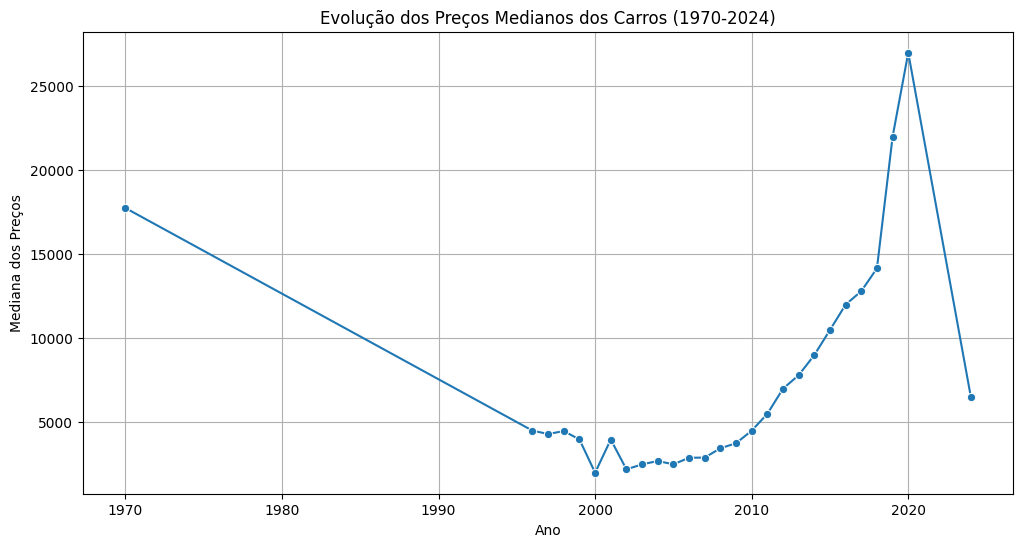

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=mediana_precos, x='year', y='price', marker='o')
plt.title('Evolução dos Preços Medianos dos Carros (1970-2024)')
plt.xlabel('Ano')
plt.ylabel('Mediana dos Preços')
plt.grid(True)
plt.show()

#### Análise com distribuição de Frequência de 10 anos

In [45]:
def ajustar_decada(ano):
    if ano >= 2020:
        return '2020-2024'
    else:
        return f'{(ano // 10) * 10}-{(ano // 10) * 10 + 10}'

df['decada'] = df['year'].apply(ajustar_decada)
df['decada'] = df['decada'].astype(str) 


In [46]:
df['decada'] = pd.Categorical(df['decada'], categories=sorted(df['decada'].unique()), ordered=True)

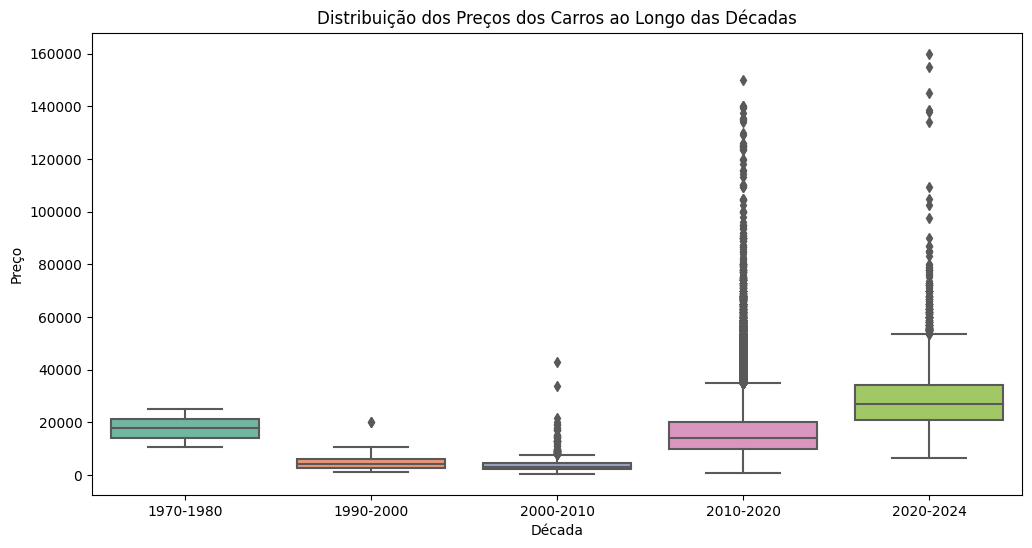

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='decada', y='price', palette='Set2')
plt.title('Distribuição dos Preços dos Carros ao Longo das Décadas')
plt.xlabel('Década')
plt.ylabel('Preço')
plt.xticks(rotation=0)  
plt.show()



### Existe uma diferença significativa de preço entre carros de diferentes fabricantes ao longo dos anos?

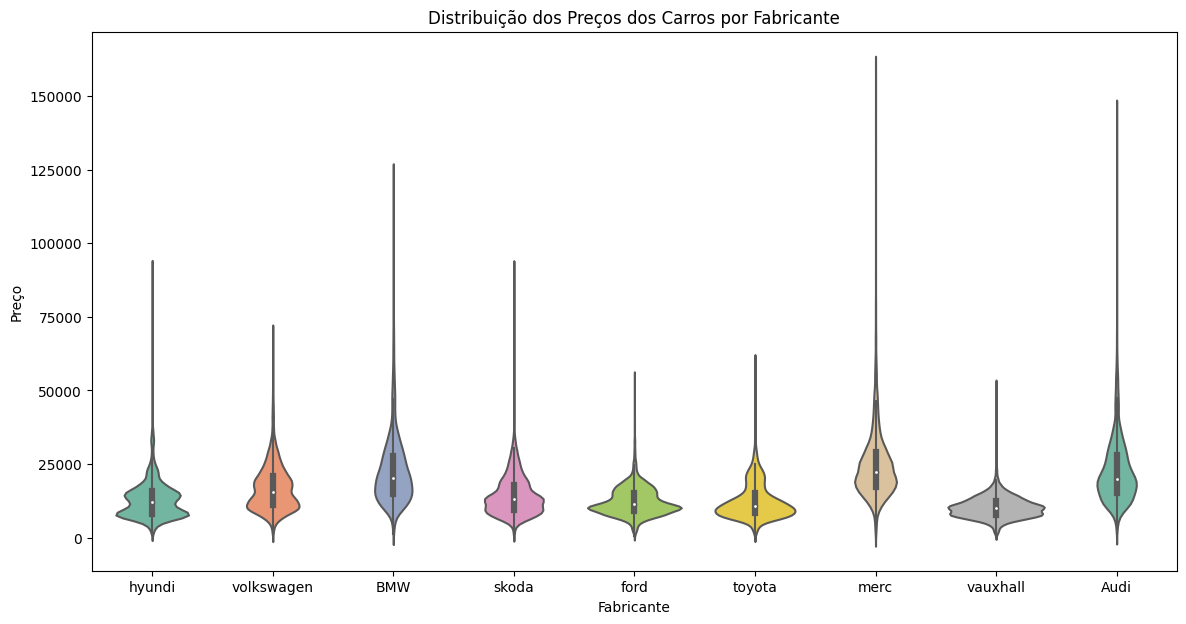

In [56]:
plt.figure(figsize=(14, 7))
sns.violinplot(data=df, x='Manufacturer', y='price', palette='Set2')

plt.title('Distribuição dos Preços dos Carros por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Preço')
plt.xticks(rotation=0) 
plt.show()

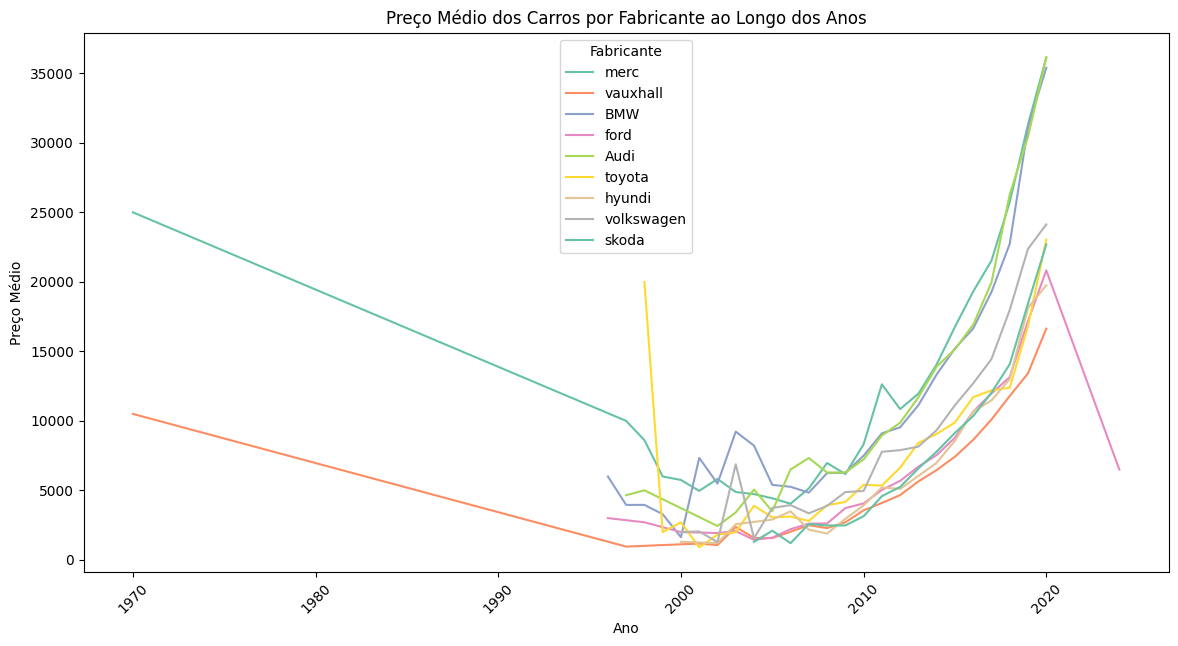

In [58]:
plt.figure(figsize=(14, 7))
df_grouped = df.groupby(['year', 'Manufacturer'])['price'].mean().reset_index()
sns.lineplot(data=df_grouped, x='year', y='price', hue='Manufacturer', palette='Set2')

# Configurações do gráfico
plt.title('Preço Médio dos Carros por Fabricante ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.legend(title='Fabricante')
plt.show()



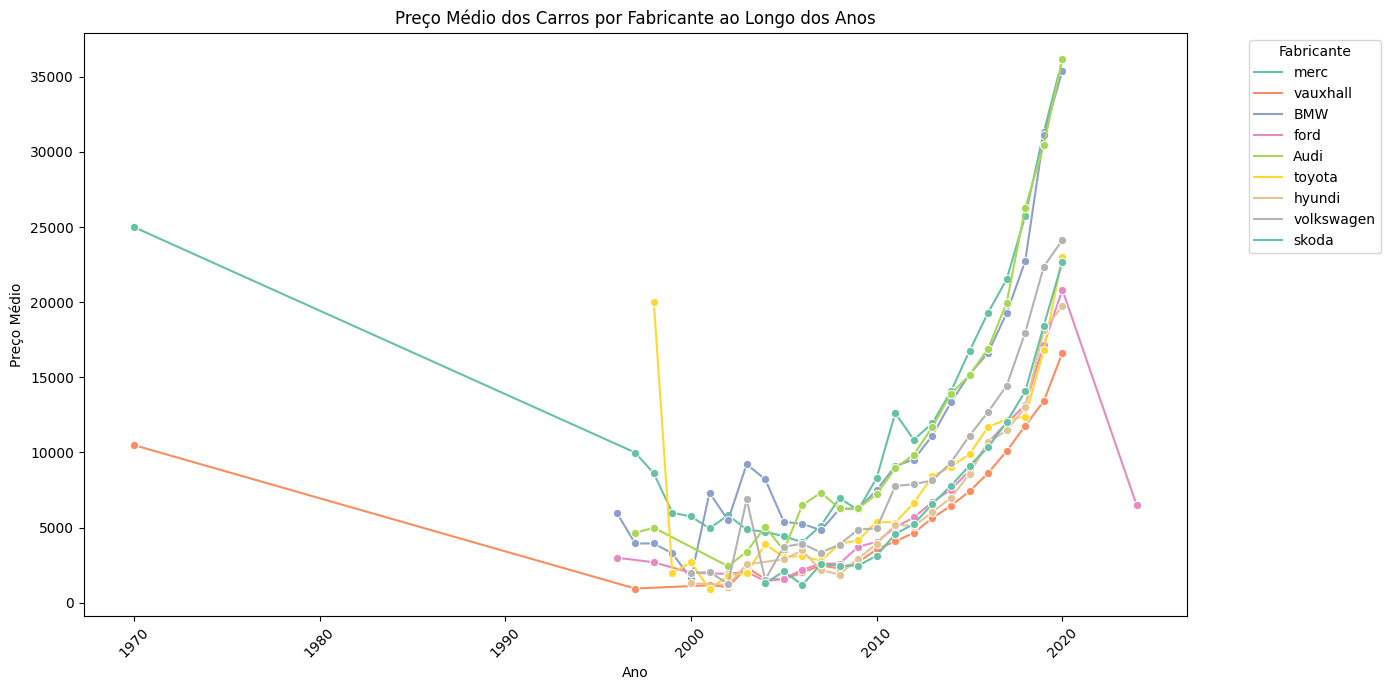

In [60]:
plt.figure(figsize=(14, 7))
df_grouped = df.groupby(['year', 'Manufacturer'])['price'].mean().reset_index()
sns.lineplot(data=df_grouped, x='year', y='price', hue='Manufacturer', marker='o', palette='Set2')

# Configurações do gráfico
plt.title('Preço Médio dos Carros por Fabricante ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo X
plt.legend(title='Fabricante', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajusta o layout para evitar que a legenda se sobreponha
plt.show()



## Hipóteses:
- O consumo médio de combustível dos carros aumentou com o passar das décadas, devido ao aumento de carros com maior potência.
- O preço médio dos carros aumentou ao longo do tempo, especialmente devido ao aumento nos custos de fabricação e melhorias tecnológicas.
- As crises econômicas, como a crise financeira de 2008, tiveram um impacto negativo nas vendas de carros de luxo e veículos de alta potência.


## 3. Insights

- Mudança de características dos carros: Como a potência e a eficiência dos motores mudaram ao longo das décadas?
- Como os preços e a demanda por carros esportivos mudaram em relação aos carros familiares?